### 📌This is Exercise problem 3

From given titanic dataset, create a model to predict if a passenger can survive titanic shipwreck  
Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the dataset

data = pd.read_csv("dataset/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handle missing values

'Cabin'

In [ ]:
data.drop('Cabin',axis=1,inplace=True)

'Age'

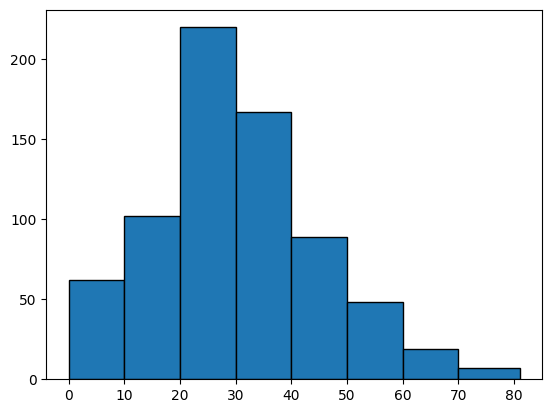

In [70]:
plt.hist(data['Age'],edgecolor='k',bins=[0,10,20,30,40,50,60,70,81])
plt.show()

Majority of ages are coming in range of 20-40  
So im giving missing instance any random value from this range

In [ ]:
range_age = range(20,40)
data['Age'] = data['Age'].apply(lambda x: np.random.choice(range_age) if pd.isna(x) else x)


## Note: initially i use "x==np.nan" but it didnot work, why? because LHS = NaN, RHS = NaN
# But Nan is never equal to Nan (even itself)

In [80]:
data['Age'].isnull().sum()

np.int64(0)

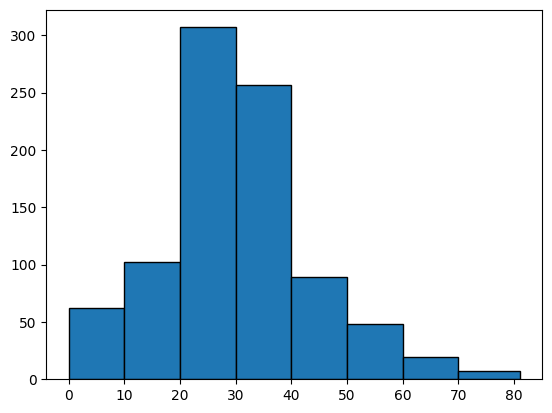

In [82]:
plt.hist(data['Age'],edgecolor='k',bins=[0,10,20,30,40,50,60,70,81])
plt.show()

Graph is still almost the same...  
Maybe we did the right thing

'Embarked'

In [90]:
data['Embarked'].value_counts()

# We have only two missing values, lets just use mode imputation

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [100]:
mode = data['Embarked'].mode()
mode[0]

'S'

In [103]:
mode = data['Embarked'].mode()
print(mode[0])
data['Embarked'].fillna(mode[0],inplace=True)

S


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Dealed with all the missing values